In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from solution import solve

In [2]:
boxes = pd.read_csv("boxes.csv")[["center_x", "center_y", "width", "height", "45width", "45height"]]

In [3]:
boxes

,center_x,center_y,width,height,45width,45height
0,704.671841,889.596720,107.275572,95.501152,43.654196,114.322310
1,818.931141,233.545738,41.848090,76.501464,66.613051,69.393035
2,1404.375687,541.747599,89.975381,47.477316,80.251682,78.168643
3,797.657890,897.166858,95.291641,88.306131,50.728938,104.715173
4,1545.211143,196.611028,45.620306,64.798281,69.662068,48.429000
...,...,...,...,...,...,...
198,1905.189056,402.271003,22.623137,33.844942,NaN,NaN
199,1906.933365,1073.787231,22.612014,11.301474,NaN,NaN
200,560.911160,878.008547,102.194066,97.889391,NaN,NaN
201,1874.162292,823.154690,34.889907,40.774540,NaN,NaN


In [4]:
ws=[]
hs=[]
rotation_matrixis = []

for i in range(len(boxes)):
    w0, h0, w1, h1 = boxes.iloc[i][["width","height", "45width","45height"]].values
    if (w1 is None) | (h1 is None) :
        ws.append(0) 
        hs.append(0)
        rotation_matrixis.append(np.array([[1,0],[0,1]]))
    else:
        w,h, rotation_matrix =  solve(w0,h0, w1,h1,0)
        ws.append(w)
        hs.append(h)
        rotation_matrixis.append(rotation_matrix)
boxes["w"] = ws
boxes["h"] = hs
boxes["rotation_matrix"] = rotation_matrixis

In [5]:
import cv2
image_path = "/home/ivan/Desktop/angle/1003"
image = cv2.imread(f"{image_path}.jpg")

/home/ivan/anaconda3/envs/mmdetection/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


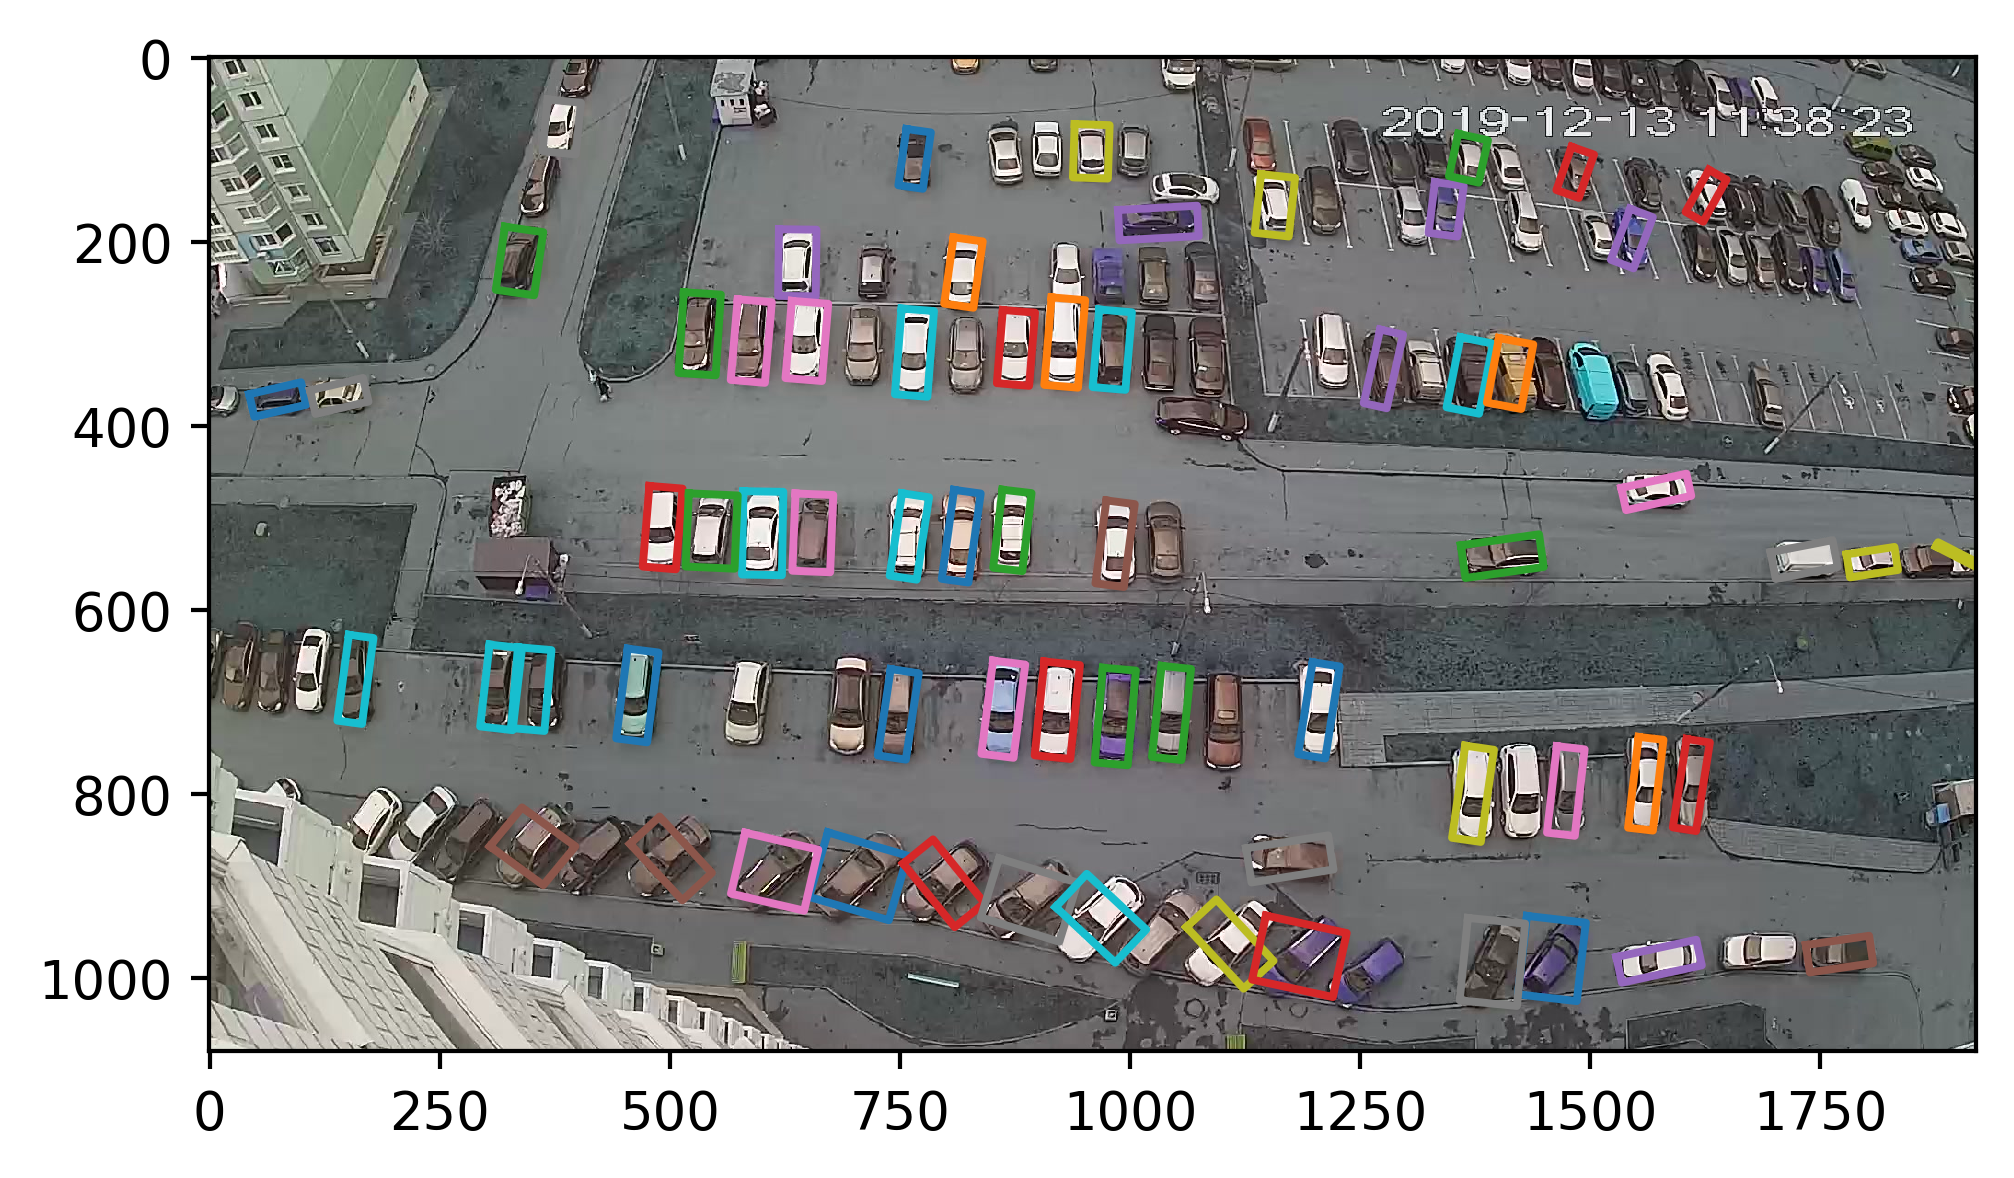

In [6]:
fig = plt.figure(dpi=380)
ax = fig.add_subplot(1, 1, 1)
for i in range(len(boxes)):
    center_x, center_y, w,h,matrix = boxes.iloc[i][["center_x", "center_y", "w", "h", "rotation_matrix"]].values
    coordinates = np.dot((np.array([[0,0],
                                    [w,0],
                                    [w,h],
                                    [0,h],
                                    [0,0]])-[w/2, h/2]), matrix) + [center_x, center_y] 
    ax.plot(coordinates[:,0], coordinates[:,1])
plt.imshow(image)
plt.show()

In [ ]:
boxes